In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox

In [2]:
customer_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [3]:
#After cleaning the dataset we decided to drop all rows that contained NaNs instead of filling them. 
#We replaced all zeros in the income column with NaNs before dropping rows with NaNs.

customer_df.dropna(inplace=True)

Text(0.5, 1.0, 'Months Since Policy Inception')

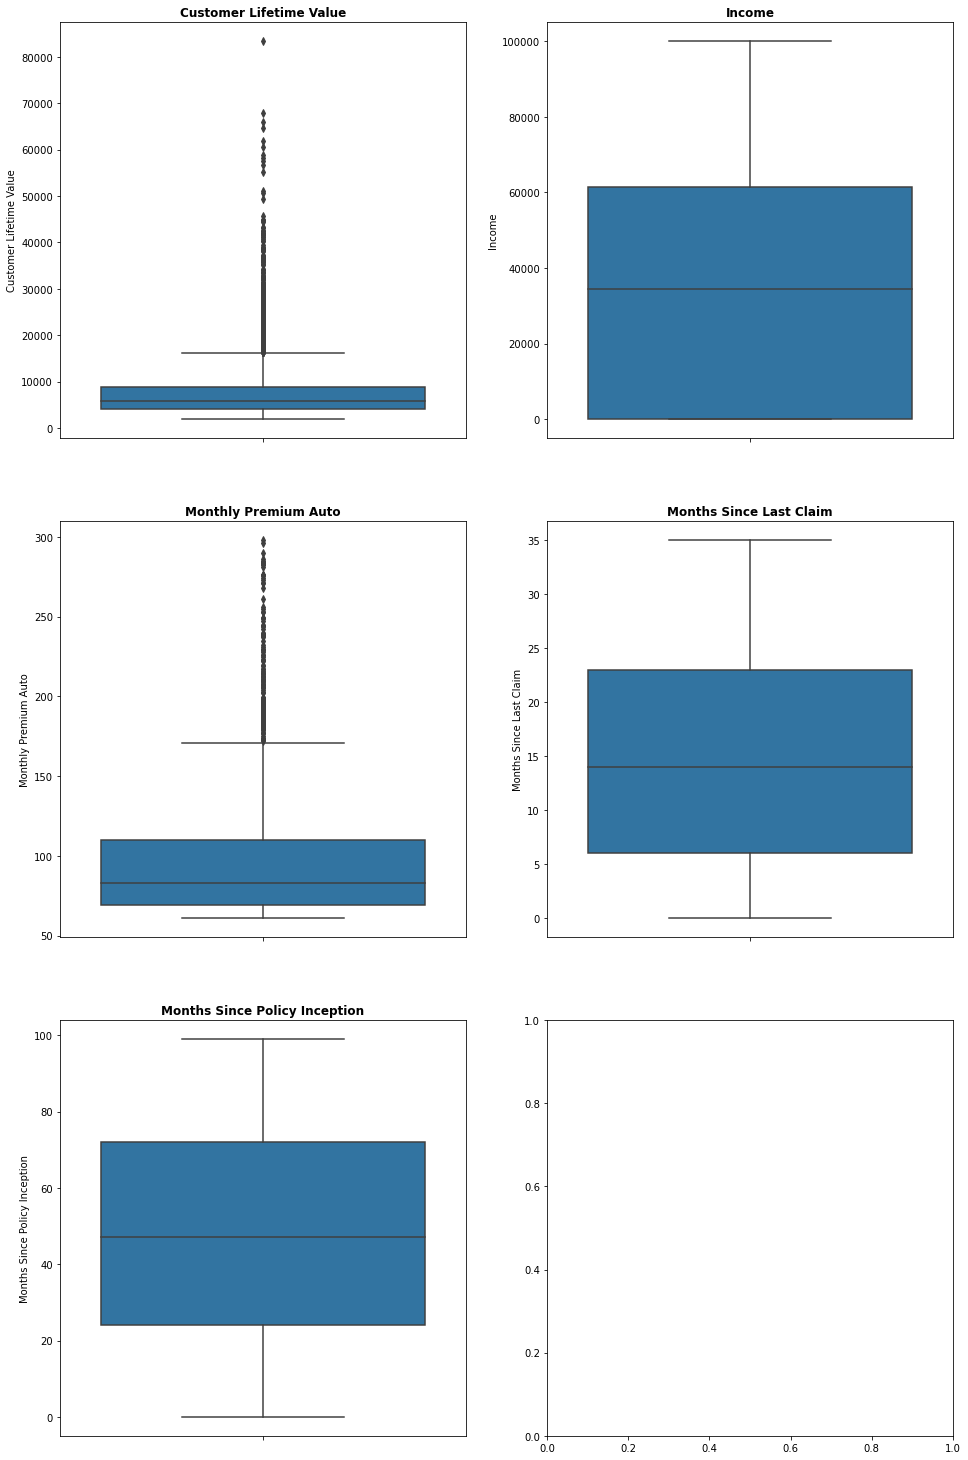

In [4]:
#To detect outliers we plotted boxplots of all numerical columns.

fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [5]:
#We decided to remove outliers from the column Customer Lifetime Value, 
#The best effect we achieved after removing all data that lied outside od three st.dev from the mean.
#Originally we also removed outliers from Monthly Premium Auto but later decided to not do it.

mean_clv = np.mean(customer_df['Customer Lifetime Value'])
std_clv = np.std(customer_df['Customer Lifetime Value'])

threshold = 3
outliers_clv = []
for i in customer_df['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

[32474.76977, 34039.05613, 32654.8383, 42561.63183, 30763.25637, 32450.39142, 36293.14678, 30205.01297, 57520.50151, 36695.90627, 33718.8424, 30061.69259, 35227.29912, 37111.65952, 58166.55351, 36229.40842, 31516.5084, 34090.03598, 41745.00646, 39400.1854, 36057.53702, 45708.65342, 41787.90343, 41787.90343, 38887.9034, 41075.42879, 33473.34946, 44856.11397, 56675.93768, 38230.21008, 38496.94701, 35440.14262, 64618.75715, 29830.38714, 42462.96794, 44468.02303, 32725.2974, 32069.87526, 44795.46942, 30745.96199, 30966.31981, 29973.41592, 30442.53824, 41491.74481, 51016.06704, 36946.06393, 40688.53442, 42389.00791, 29091.23936, 30718.8124, 32864.4046, 29006.67071, 31316.61358, 35692.17157, 37243.63312, 32098.32209, 34243.51034, 66025.75407, 30141.61738, 35850.59935, 60556.19213, 33473.34946, 38055.20953, 55277.44589, 43019.01278, 36181.02892, 61850.18803, 41855.17315, 30475.78048, 41787.90343, 39033.08248, 41103.24183, 41787.90343, 83325.38119, 35944.71048, 32317.03275, 30118.6554, 58753.8

In [6]:
#Here we remove all the rows that contain outliers.

customer_df = customer_df[customer_df['Customer Lifetime Value'].isin(outliers_clv) == False]

Text(0.5, 1.0, 'Months Since Policy Inception')

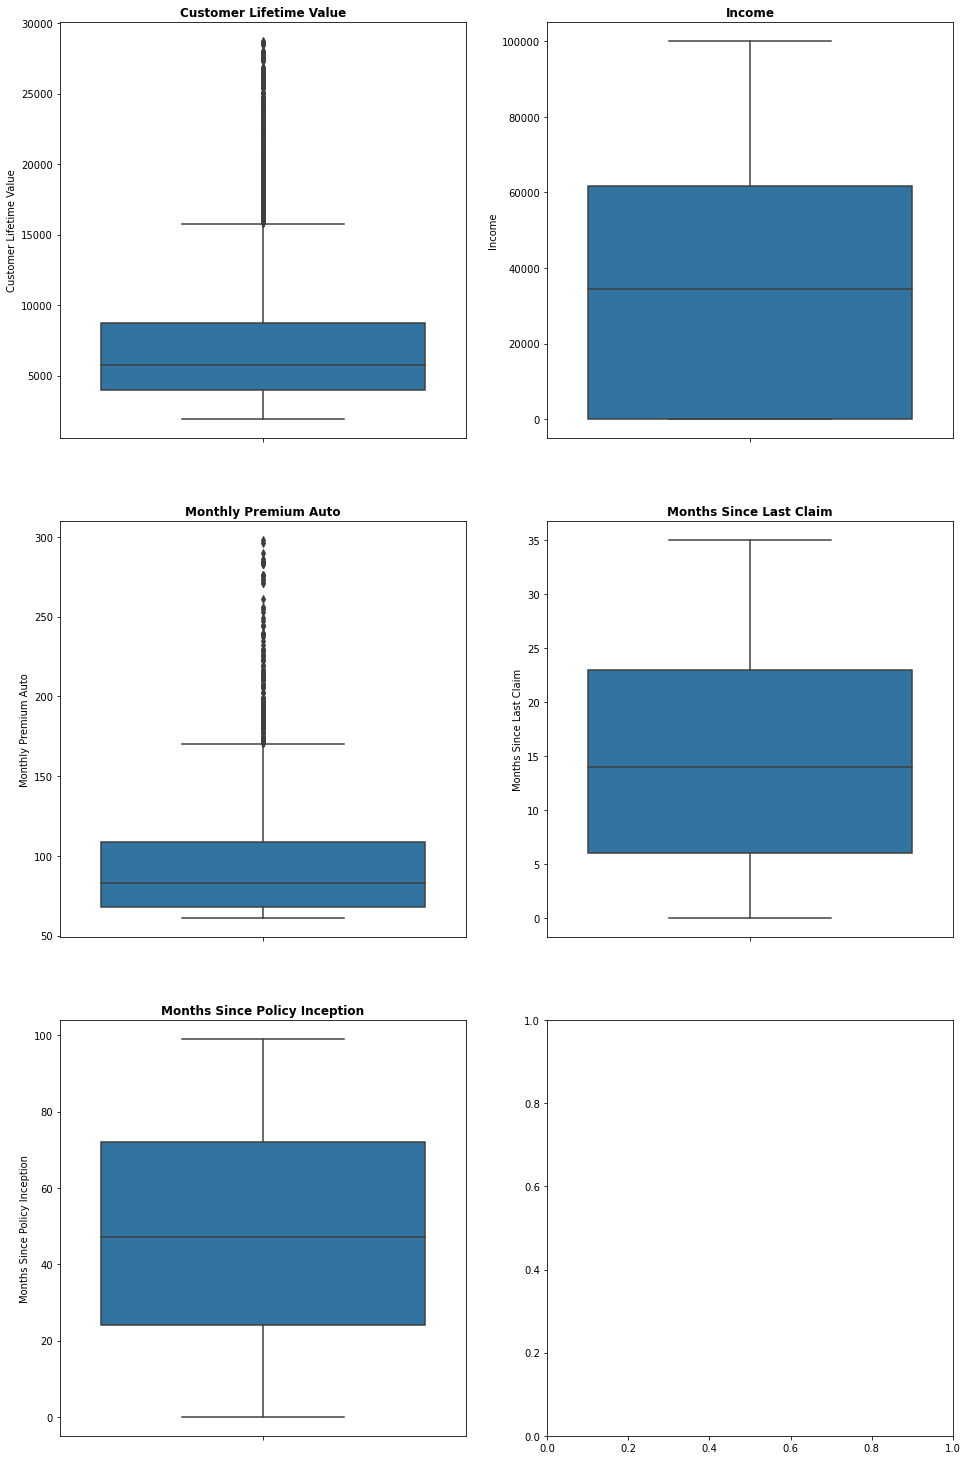

In [7]:
#Here we plot boxplots one more time to see the difference 

fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [8]:
# X / y Split 

X = customer_df.drop('Total Claim Amount', axis=1)

y = customer_df['Total Claim Amount'] #target variable

In [9]:
# split X to numerical and categorical dataframes for transformation of data

X_numeric = X._get_numeric_data()
X_numeric.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True) 

#drop these two columns because they are categorical

X_categorical = X.select_dtypes(np.object)

X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
X_categorical['Number of Policies'] = customer_df['Number of Policies']
X_categorical.drop('Customer', axis=1, inplace=True) #dropping the column with the customer ID

In [10]:
# Get dummies for categorical variables

X_categorical=pd.get_dummies(X_categorical, drop_first=True)

In [11]:
# Concatenate numerical and categorical dataframes 

X = pd.concat([X_numeric, X_categorical], axis=1)
X

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
2,2,14947.917300,22139,100,34.0,31,0.0,2,0,0,...,0,1,0,0,0,1,0,0,1,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,0,0,...,1,0,0,0,0,0,0,0,1,0
10,10,5154.764074,82730,127,13.0,31,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
13,13,5454.587929,66334,69,25.0,25,0.0,4,1,0,...,0,1,0,0,0,0,0,1,1,0
16,16,5326.677654,76717,66,26.0,10,0.0,6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,3579.023825,28304,91,10.0,30,2.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
10904,10904,19228.463620,0,187,14.0,32,0.0,2,0,1,...,1,0,0,0,1,0,0,0,1,0
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,0,0,...,1,0,0,0,0,0,0,0,1,0


In [12]:
# Data splitting to TRAIN / TEST sets in ratio 80/20 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=123)

In [13]:
# Standardize the numerical data 

#TRAIN

std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [14]:
#TEST

X_test_scaled=std_scaler.transform(X_test)

In [15]:
# Model fitting 

model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
#coefficients

model.coef_

array([ 3.51295781e-03, -1.97156942e+00, -9.80991096e+00,  1.61958985e+02,
        1.03138335e+00, -2.39790059e+00, -3.20449264e+00,  5.34112637e+00,
        1.35678439e+00, -2.12545056e+00,  1.13882954e+00, -1.19246256e+00,
       -9.26231901e+00, -2.21843639e+00,  2.87258883e+00, -3.46085366e+00,
       -2.41140331e+00,  2.80269824e+00, -6.18952178e+00,  3.72827700e+00,
       -6.31505013e-01,  6.29141169e-01, -1.72896218e-01,  4.25721771e+00,
        2.29008712e+00,  1.55703741e+00, -2.27040157e+00, -2.50971012e-01,
       -1.92315086e+00,  6.38627427e+00,  4.19259833e+00,  1.72648377e+00,
        8.59380683e-01,  2.76550039e+00, -1.14449700e+00,  2.09180982e+00,
       -6.97105108e-01,  4.88618962e-01,  5.37909307e+00,  2.33488386e+00,
        5.34237372e+00, -2.20201543e+00,  2.21718977e+00, -5.48725483e-01,
       -3.74722304e-01,  3.35150535e+00,  4.32883804e-01,  7.25972404e-02,
       -2.28024102e+00,  2.30057658e+00,  2.39786559e+00, -5.15457950e-01,
       -2.74355119e+00,  

In [17]:
#intercept

model.intercept_

431.5836226039292

In [18]:
#score of the model (R2) on the test set

R2 = model.score(X_test_scaled, y_test)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7476186187392643
0.7123046642367994


In [19]:
#score of the model (R2) on train set

R2 = model.score(X_train_scaled, y_train)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7752535673332162
0.7438063771397894


In [20]:
#prediciton

y_pred=model.predict(X_test_scaled)

In [21]:
y_pred

array([ 2.98675118e+02,  4.01664442e+02,  8.74962758e+01,  2.55163152e+02,
        8.79585253e+02,  3.54025931e+02,  7.23818611e+02,  6.20398481e+02,
        3.58414854e+02,  4.44867650e+02,  3.76648645e+02,  2.75506198e+02,
        8.01759253e+02, -8.37471831e+00,  4.70201215e+02,  4.41608010e+02,
        4.08071247e+02,  4.21260146e+02,  7.63775479e+02,  6.57511543e+02,
       -2.19894334e+01,  7.10986200e+02,  4.26941262e+02,  6.00252659e+02,
        7.85683773e+02,  5.02591810e+02,  5.76952214e+02,  1.57761490e+02,
        5.17802634e+02,  4.34653386e+02,  5.90411553e+02, -5.51311513e+01,
        8.80753757e+02,  3.79097774e+02,  6.14617722e+02,  2.17636790e+02,
        5.11099212e+02,  2.97606759e+02,  7.02474126e+02,  1.04491892e+03,
        7.14999871e+02,  4.42373074e+02,  5.46193032e+02,  4.00114579e+02,
        5.38741105e+02,  8.64235269e+01,  2.66288916e+02,  1.74256902e+02,
        2.21767707e+02,  5.25678422e+02,  2.20857246e+02,  1.06033494e+03,
        4.23533691e+01,  

In [22]:
y_test

8234    250.959093
9217    315.215329
2137     19.575683
6525    229.279059
32      871.457982
           ...    
6981    674.973614
7820    278.242040
3807    342.481173
1867     85.155359
7888    365.361427
Name: Total Claim Amount, Length: 889, dtype: float64

In [23]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
8234,250.959093,298.675118
9217,315.215329,401.664442
2137,19.575683,87.496276
6525,229.279059,255.163152
32,871.457982,879.585253
...,...,...
6981,674.973614,627.464887
7820,278.242040,189.187880
3807,342.481173,451.710553
1867,85.155359,159.982493


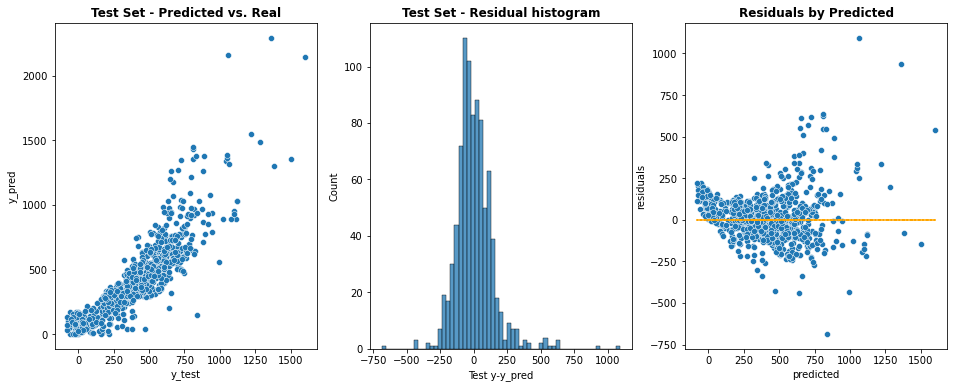

In [24]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

In [25]:
#Model validation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

20436.512492716927
99.49597253069922
142.9563307192687


In [26]:
#Feature Importance (least important features on top because we wanted to decide if we should delete some columns)

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)

In [27]:
features_importances

,Attribute,Importance
59,Effective To Date_2/19/11,2.405297e-03
0,Unnamed: 0,3.512958e-03
47,Effective To Date_1/8/11,7.259724e-02
58,Effective To Date_2/18/11,1.135376e-01
99,Sales Channel_Branch,1.244510e-01
...,...,...
92,Policy_Personal L3,1.555217e+13
93,Policy_Special L1,2.291586e+13
94,Policy_Special L2,3.305238e+13
95,Policy_Special L3,3.406598e+13


# Comparing Regression Models

In [28]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression


def linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=LinearRegression()):
  
    
    
    model = lin_model
    model_fitted = model.fit(X_train, y_train)
    
    
    return (f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

   
    
    

In [29]:
linear_function (X_train_scaled, X_test_scaled, y_train, y_test, lin_model=LinearRegression())


'LinearRegression: Train -> 0.7752537189850927, Test -> 0.7476299638437345'

In [30]:
linear_function (X_train_scaled, X_test_scaled, y_train, y_test, lin_model=Ridge(alpha=1))

'Ridge: Train -> 0.7752373274300226, Test -> 0.7483025868434009'

In [31]:
linear_function (X_train_scaled, X_test_scaled, y_train, y_test, lin_model=Lasso(alpha=0.01))

'Lasso: Train -> 0.7752415904087196, Test -> 0.748332291178425'

In [32]:
linear_function (X_train_scaled, X_test_scaled, y_train, y_test, lin_model=ElasticNet(alpha=0.01))

'ElasticNet: Train -> 0.7741287922576943, Test -> 0.7514423476819863'

In [33]:
from sklearn.feature_selection import RFE 

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 53, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator 

,Response_Yes,Coverage_Extended,Coverage_Premium,Education_Master,Effective To Date_1/10/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/17/11,Effective To Date_1/19/11,Effective To Date_1/2/11,...,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=LinearRegression())

'LinearRegression: Train -> 0.7614556981643928, Test -> 0.7302429198090794'

In [35]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=Lasso(alpha=0.1))

'Lasso: Train -> 0.7611529768049643, Test -> 0.7324423500612606'

In [36]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=ElasticNet(alpha=0.01))

'ElasticNet: Train -> 0.7498810084815759, Test -> 0.7250814240275976'

In [37]:

X_added_constant = sm.add_constant(X_train)
X_added_constant

y_train = np.array(y_train)

In [38]:
y_train

array([312.      , 307.2     , 446.4     , ..., 226.10336 , 436.369797,
       496.477418])

In [39]:
model = sm.OLS(y_train, X_added_constant).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:58:11   Log-Likelihood:                -22675.
No. Observations:                3554   AIC:                         4.545e+04
Df Residuals:                    3502   BIC:                         4.578e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.6736     13.456     -0.570      0.569     -34.056      18.709
Response_Yes                     -30.1227      7.353     -4.096      0.000     -44.540     -15.705
Coverage_Extended                 91.9848      5.448     16.885      0.000      81.304     102.666
Coverage_Premium                 238.1237      8.745     27.231      0.000     220.979     255.269
Education_Master                 -19.0813      8.856     -2.155      0.031     -36.446      -1.717
Effective To Date_1/10/11         25.5739     16.581      1.542      0.123      -6.935      58.083
Effective To Date_1/14/11         23.3813     19.998      1.169      0.242     -15.828      62.591
Effective To Date_1/15/11         16.4069     19.389      0.846      0.398     -21.608      54.422
Effective To Date_1/17/11        -19.2372     18.380     -1.047      0.295     -55.273      16.799
Effective To Date_1/19/11        -20.4848     16.492     -1.242      0.214     -52.820      11.851
Effective To Date_1/2/11          44.3061     19.750      2.243      0.025       5.583      83.029
Effective To Date_1/20/11         28.7900     17.703      1.626      0.104      -5.919      63.499
Effective To Date_1/22/11         16.5451     20.349      0.813      0.416     -23.352      56.442
Effective To Date_1/28/11         36.0053     17.488      2.059      0.040       1.717      70.294
Effective To Date_1/29/11         19.2267     19.754      0.973      0.330     -19.503      57.957
Effective To Date_1/3/11          31.1086     17.808      1.747      0.081      -3.806      66.023
Effective To Date_1/30/11        -23.3944     20.850     -1.122      0.262     -64.273      17.484
Effective To Date_1/6/11          15.8655     18.809      0.843      0.399     -21.013      52.744
Effective To Date_1/9/11         -16.1478     19.258     -0.839      0.402     -53.906      21.610
Effective To Date_2/1/11          18.4888     18.481      1.000      0.317     -17.747      54.724
Effective To Date_2/10/11         12.3240     17.619      0.699      0.484     -22.221      46.869
Effective To Date_2/12/11        -26.9344     18.765     -1.435      0.151     -63.727       9.858
Effective To Date_2/15/11        -19.8178     19.448     -1.019      0.308     -57.948      18.312
Effective To Date_2/16/11        -24.5701     19.640     -1.251      0.211     -63.077      13.936
Effective To Date_2/17/11         35.8662     18.947      1.893      0.058      -1.282      73.015
Effective To Date_2/21/11         12.5181     18.495      0.677      0.499     -23.744      48.781
Effective To Date_2/22/11         45.0364     18.412      2.446      0.014       8.936      81.137
Effective To Date_2/23/11        -16.3954     19.448     -0.843      0.399     -54.527      21.736
Effective To D

In [42]:
X_added_constant = X_added_constant[['Response_Yes','Coverage_Extended','Coverage_Premium','Education_Master','Effective To Date_1/2/11','Effective To Date_2/22/11',
                                     'EmploymentStatus_Unemployed', 'Gender_M', 'Location Code_Suburban', 'Location Code_Urban', 'Marital Status_Single',
                                     'Policy_Special L1', 'Renew Offer Type_Offer2', 'Vehicle Class_Luxury Car','Vehicle Class_Luxury SUV','Vehicle Class_SUV','Vehicle Class_SUV'
                                    
                                    
                                    
                                    ]]

In [43]:
model = sm.OLS(y_train, X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              2461.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:06:22   Log-Likelihood:                         -22843.
No. Observations:                3554   AIC:                                  4.572e+04
Df Residuals:                    3538   BIC:                                  4.582e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Response_Yes                  -23.7076      7.443     -3.185      0.001     -38.301      -9.114
Coverage_Extended              89.5331      5.449     16.433      0.000      78.851     100.216
Coverage_Premium              232.6288      8.923     26.072      0.000     215.135     250.123
Education_Master              -13.4728      9.051     -1.489      0.137     -31.219       4.273
Effective To Date_1/2/11       45.0724     20.410      2.208      0.027       5.055      85.090
Effective To Date_2/22/11      44.2607     18.944      2.336      0.020       7.118      81.403
EmploymentStatus_Unemployed    79.6882      6.603     12.069      0.000      66.743      92.634
Gender_M                       17.0210      4.803      3.544      0.000       7.605      26.437
Location Code_Suburban        377.0016      5.446     69.226      0.000     366.324     387.679
Location Code_Urban           209.1738      6.844     30.563      0.000     195.755     222.592
Marital Status_Single          67.7581      6.105     11.098      0.000      55.788      79.729
Policy_Special L1              62.1743     27.552      2.257      0.024       8.155     116.193
Renew Offer Type_Offer2        10.0370      5.346      1.878      0.061      -0.444      20.518
Vehicle Class_Luxury Car      688.8941     18.216     37.818      0.000     653.179     724.609
Vehicle Class_Luxury SUV      706.8777     18.616     37.972      0.000     670.379     743.377
Vehicle Class_SUV              97.8380      3.158     30.986      0.000      91.647     104.029
Vehicle Class_SUV              97.8380      3.158     30.986      0.000      91.647     104.029
==============================================================================
Omnibus:                     1567.847   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21213.661
Skew:                           1.731   Prob(JB):                         0.00
Kurtosis:                      14.457   Cond. No.                     5.80e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""